In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import scipy.stats as stats
import math

In [2]:
file = r"C:\Users\PcLaptop\Documents\GitHub\APlanet\Pilot_2\Rearrange_datasets\part3_text.xlsx"

xl1= pd.ExcelFile(file)      # Load spreadsheet
df1 = xl1.parse('Sheet1')    # Load a sheet into a DataFrame by name: df1
df1.index  = np.arange(len(df1))
df1.drop(columns=['Unnamed: 0'], inplace=True)
#drop rows where player.HL is nan
df1.dropna(subset=['player.HH','player.HL','player.LH','player.LL'], inplace=True)
#drop rows where player.EE is 0
df1 = df1[df1['player.EE']!=0]
df1 = df1[df1['player.PNB']!=0]
df1 = df1[df1['player.NE']!=0]
df1.reset_index(drop=True, inplace=True)
df1

,participant.code,participant.id_in_session,player.EE,What share (in %) of other participants in the survey do you think have chosen one of the transport modes in A for their daily trip?,player.HH,Imagine that most of the people answering this survey say that they use option A for their daily trip and that most of them think that other people should also use option A. How often (in %) would you use option A in this scenario?,player.HL,Imagine that most of the people answering this survey say that they use option A for their daily trip and that most of them think that other people should use option B. How often (in %) would you use option A in this scenario?,player.LH,Imagine that most of the people answering this survey say that they use option B for their daily trip and that most of them think that other people should use option A. How often (in %) would you use option A in this scenario?,...,player.trust_parties,Political parties:,player.trust_politicians,National politicians:,player.vote,Which political party you voted for in the last election?,player.year_born,session.code,subsession.round_number,treatment
0,00yymq0o,56,8.0,30%,1.0,0%,4.0,30%,1.0,0%,...,4.0,4,4.0,4,0.0,PSOE,1996.0,uln4i2w2,1,Baseline
1,025baf3d,53,4.0,70%,6.0,50%,9.0,80%,9.0,80%,...,3.0,3,3.0,3,3.0,Unidas Podemos,2001.0,uln4i2w2,1,Public Services
2,029z3dj5,86,7.0,60%,5.0,40%,5.0,40%,5.0,40%,...,1.0,1,1.0,1,13.0,prefiero no responder,1996.0,2lf8iml1,1,Baseline
3,04x8stxz,35,8.0,30%,9.0,80%,9.0,80%,9.0,80%,...,2.0,2,1.0,1,0.0,PSOE,2002.0,uln4i2w2,1,Social Norm
4,06u8w2cd,37,9.0,20%,6.0,50%,3.0,20%,9.0,80%,...,1.0,1,1.0,1,5.0,Ciudadanos,1999.0,uln4i2w2,1,Pollution
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,zuchyshq,201,3.0,20%,1.0,0%,3.0,20%,2.0,10%,...,2.0,2,2.0,2,5.0,Ciudadanos,1993.0,uln4i2w2,1,Baseline
475,zw6h1g9v,268,5.0,40%,3.0,20%,4.0,30%,4.0,30%,...,2.0,2,2.0,2,13.0,prefiero no responder,1991.0,uln4i2w2,1,Public Services
476,zx9q6r8j,200,6.0,50%,5.0,40%,8.0,70%,7.0,60%,...,1.0,1,1.0,1,1.0,Partido Popular,2000.0,uln4i2w2,1,Social Norm
477,zyp5jsph,234,7.0,40%,7.0,60%,5.0,40%,5.0,40%,...,1.0,1,1.0,1,12.0,otro partido,1996.0,uln4i2w2,1,Road Pricing


In [3]:
pd.set_option('display.max_columns', None)
df1

,participant.code,participant.id_in_session,player.EE,What share (in %) of other participants in the survey do you think have chosen one of the transport modes in A for their daily trip?,player.HH,Imagine that most of the people answering this survey say that they use option A for their daily trip and that most of them think that other people should also use option A. How often (in %) would you use option A in this scenario?,player.HL,Imagine that most of the people answering this survey say that they use option A for their daily trip and that most of them think that other people should use option B. How often (in %) would you use option A in this scenario?,player.LH,Imagine that most of the people answering this survey say that they use option B for their daily trip and that most of them think that other people should use option A. How often (in %) would you use option A in this scenario?,player.LL,Which year were you born?,Imagine that most of the people answering this survey say that they use option B for their daily trip and that most of them also think that other people should use option B. How often (in %) would you use option A in this scenario?,player.Madrid_central,player.NE,What share (in %) of other participants in the survey do you think have mostly chosen option A (answered more than 50%) in the previous question?,player.PNB,"In your opinion, what should the ideal percentage of people using transport modes in A for their daily trip be?",player.SN_car_A,Considering the following transport mode group:,player.air_pollution,"How much do you agree with the following statements from 1 to 7, where 1 means ‘I completely disagree’ and 7 means ‘I completely agree’? Air pollution derived by cars is one of the major causes of premature death in Europe:",player.children,How many children under the age of 15 live with you?,player.comments,player.education,What is your highest level of education?,player.effect_rp,player.effect_rp_others,player.family,How many people does your household have including you?,player.gender,How do you identify as?,player.id_in_group,player.income,What is your income per year?,player.my_trip,"Considering the last year, how often (in %) did you use your chosen transport mode for your daily trip?",player.revenues,Revenues collected through taxes are used to create a well-functioning welfare state and society:,player.road_pricing,The introduction of policies such as road pricing will alleviate congestion problems:,player.tax,Tax revenues should be used to help those who are more in need:,player.tax_level,player.trust_county,County council:,player.trust_government,Government:,player.trust_municipality,Municipal council,player.trust_parlament,"How much do you personally trust the following institutions from 1 to 7, where 1 means ‘No trust at all’ and 7 means ‘Trust compltely’? Parlament:",player.trust_parties,Political parties:,player.trust_politicians,National politicians:,player.vote,Which political party you voted for in the last election?,player.year_born,session.code,subsession.round_number,treatment
0,00yymq0o,56,8.0,30%,1.0,0%,4.0,30%,1.0,0%,1.0,1996,0%,4.0,10.0,10%,11.0,0%,0.0,"A: Public Transport, cycling and walking",7.0,7,0.0,0,NaN,3.0,university (more than 4 years),6.0,4.0,0.0,0,0.0,woman,56,0.0,less than 10k EUR,11.0,100%,5.0,5,5.0,5,6.0,6,1.0,5.0,5,5.0,5,4.0,4,6.0,6,4.0,4,4.0,4,0.0,PSOE,1996.0,uln4i2w2,1,Baseline
1,025baf3d,53,4.0,70%,6.0,50%,9.0,80%,9.0,80%,9.0,2001,80%,3.0,8.0,30%,9.0,20%,0.0,"A: Public Transport, cycling and walking",6.0,6,0.0,0,Falta de opción de 0 en la pregunta sobre la c...,2.0,university (less than 4 years),3.0,1.0,2.0,2,0.0,woman,53,0.0,less than 10k EUR,11.0,100%,3.0,3,4.0,4,6.0,6,2.0,4.0,4,4.0,4,6.0,6,5.0,5,3.0,3,3.0,3,3.0,Unidas Podemos,2001.0,uln4i2w2,1,Public Services
2,029z3dj5,86,7.0,60%,5.0,40%,5.0,40%,5.0,40%,4.0,1996,30%,6.0,6.0,50%,4.0,30%,1.0,A: Private vehicle,1.0,1,0.0,0,NaN,3.0,university (more than 4 years),1.0,1.0,4.0,4,1.0,man,86,0.0,less than 10k E

In [4]:
dfa=df1
for i in range(len(df1)):
    if dfa['player.SN_car_A'][i]!=1:
        dfa=dfa.drop(i)

dfb=df1
for i in range(len(df1)):
    if dfb['player.SN_car_A'][i]!=0:
        dfb=dfb.drop(i)

In [5]:
x_a = np.linspace(0,10,11)
x_b = np.linspace(0,10,11)

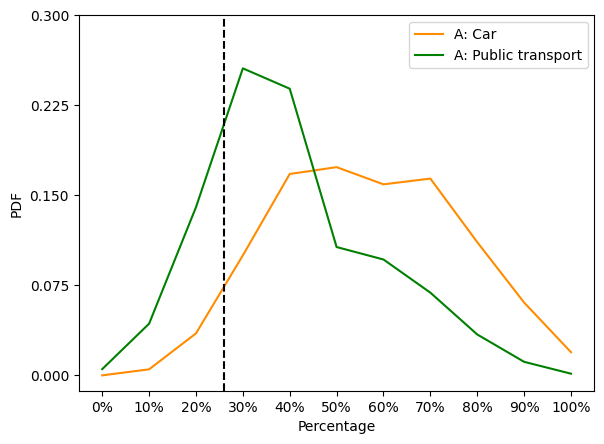

In [6]:
dens_a = stats.gaussian_kde(dfa['player.EE'])
dens_b = stats.gaussian_kde(11-dfb['player.EE'])

plt.plot(x_a, dens_a(x_a), label='A: Car ',color='darkorange')
plt.plot(x_b, dens_b(x_b), label='A: Public transport',color='green')
#plt vertical dashed line
plt.axvline(x=2.59, color='black', linestyle='--')
plt.xlabel("Percentage")
plt.ylabel("PDF")
plt.legend(loc='upper right')
plt.yticks((np.linspace(0,0.3,5)))
plt.xticks((np.linspace(0,10,11)), ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.tight_layout(pad=2, w_pad=4, h_pad=3)
#plt.title('Percentage of the expected use of car among participants')
          
plt.savefig(r'C:\Users\PcLaptop\Documents\GitHub\APlanet\Pilot_2\Results\kern_EE.png')
plt.show()

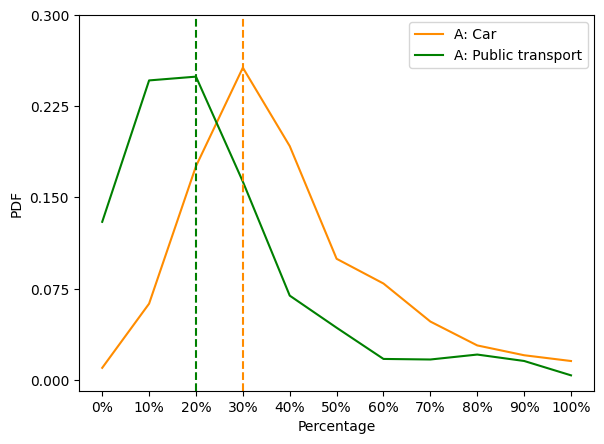

In [7]:
dens_a = stats.gaussian_kde(dfa['player.PNB'])
dens_b = stats.gaussian_kde(11-dfb['player.PNB'])

plt.plot(x_a, dens_a(x_a), label='A: Car ',color='darkorange')
plt.plot(x_b, dens_b(x_b), label='A: Public transport',color='green')
plt.xlabel("Percentage")
plt.ylabel("PDF")
plt.legend(loc='upper right')
plt.axvline(11-dfb['player.PNB'].median(), color='g',ls='--')
plt.axvline(dfa['player.PNB'].median(), color='darkorange',ls='--')
#plt.fill_between(np.linspace(50,100,21),dens_a(np.linspace(50,100,21)),alpha=0.2)
#plt.fill_between(np.linspace(50,100,21),dens_b(np.linspace(50,100,21)),alpha=0.2)
plt.yticks((np.linspace(0,0.3,5)))
#plt.title('Percentage of the ideal use of car among participants')
plt.xticks((np.linspace(0,10,11)), ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.tight_layout(pad=2, w_pad=4, h_pad=3)
#plt.savefig(r'C:\Users\PcLaptop\Documents\GitHub\APlanet\Pilot_2\Results\kern_PNB.png')
plt.show()

In [8]:
dfa.index= np.arange(len(dfa))
dfb.index= np.arange(len(dfb))
counta=0
countb=0
for i in range(len(dfb['player.PNB'])):
    if dfa['player.PNB'][i] > 5:
        counta+=1
    if dfb['player.PNB'][i] <= 5:
        countb+=1
(counta+countb)/len(df1)

0.12108559498956159

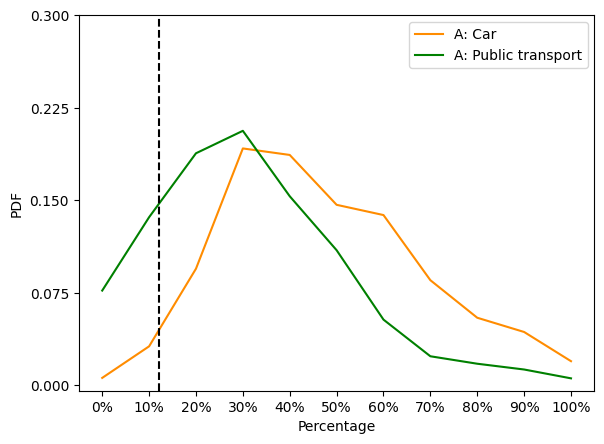

In [9]:
dens_a = stats.gaussian_kde(dfa['player.NE'])
dens_b = stats.gaussian_kde(11-dfb['player.NE'])

plt.plot(x_a, dens_a(x_a), label='A: Car ',color='darkorange')
plt.plot(x_b,dens_b(x_b), label='A: Public transport',color='green')
plt.xlabel("Percentage")
plt.ylabel("PDF")
plt.legend(loc='upper right')
plt.axvline((counta+countb)/len(df1)*10, color='k',ls='--')
plt.yticks((np.linspace(0,0.3,5)))
plt.xticks((np.linspace(0,10,11)), ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.tight_layout(pad=2, w_pad=4, h_pad=3)
#plt.savefig(r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\bars\kern3.png')
plt.show()

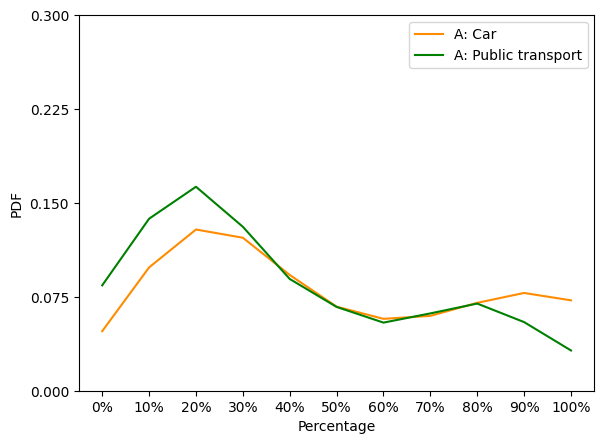

In [10]:
dens_a = stats.gaussian_kde(dfa['player.HH'])
dens_b = stats.gaussian_kde(11-dfb['player.LL'])

plt.plot(x_a, dens_a(x_a), label='A: Car ',color='darkorange')
plt.plot(x_b,dens_b(x_b), label='A: Public transport',color='green')
plt.xlabel("Percentage")
plt.ylabel("PDF")
plt.legend(loc='upper right')
plt.yticks((np.linspace(0,0.3,5)))
plt.xticks((np.linspace(0,10,11)), ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.tight_layout(pad=2, w_pad=4, h_pad=3)
#plt.savefig(r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\bars\kernHH.png')
plt.show()

In [11]:
np.mean(dfa['player.HH']),np.std(dfa['player.HH']),np.mean(10-dfb['player.LL']),np.std(10-dfb['player.LL'])

(5.216216216216216, 3.4123848316045557, 2.8, 2.9474179763434876)

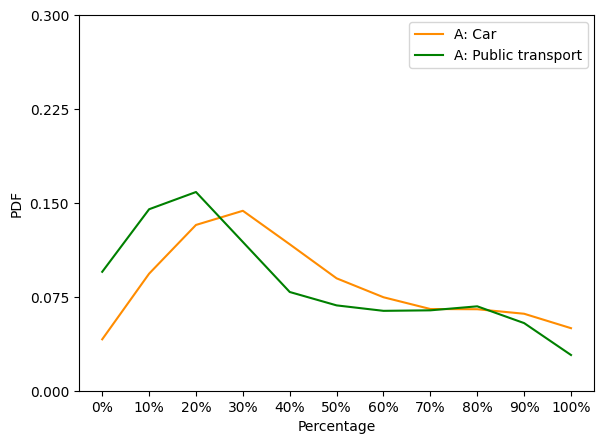

In [12]:
dens_a = stats.gaussian_kde(dfa['player.HL'])
dens_b = stats.gaussian_kde(11-dfb['player.LH'])

plt.plot(x_a, dens_a(x_a), label='A: Car ',color='darkorange')
plt.plot(x_b,dens_b(x_b), label='A: Public transport',color='green')
plt.xlabel("Percentage")
plt.ylabel("PDF")
plt.legend(loc='upper right')
plt.yticks((np.linspace(0,0.3,5)))
plt.xticks((np.linspace(0,10,11)), ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.tight_layout(pad=2, w_pad=4, h_pad=3)
#plt.savefig(r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\bars\kernHL.png')
plt.show()

In [13]:
np.mean(dfa['player.HL']),np.std(dfa['player.HL']),np.mean(10-dfb['player.LH']),np.std(10-dfb['player.LH'])

(4.8301158301158305, 3.041873214102794, 2.6818181818181817, 2.9416501806169877)

In [14]:
#count nan in dfa['player.LH']
count=0
for i in range(len(dfa['player.HH'])):
    if math.isnan(dfa['player.HH'][i]):
        count+=1
count

0

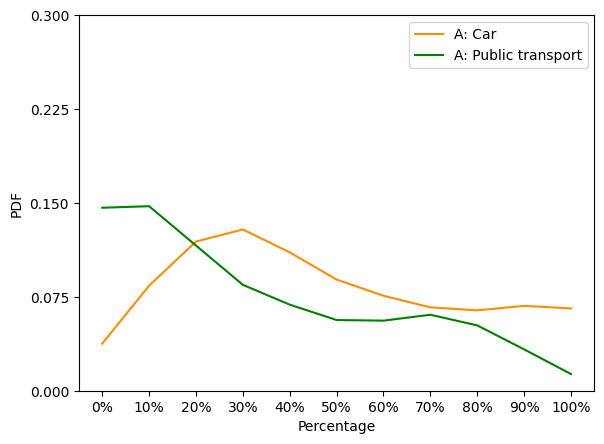

In [15]:
dens_a = stats.gaussian_kde(dfa['player.LH'])
dens_b = stats.gaussian_kde(10-dfb['player.HL'])

plt.plot(x_a, dens_a(x_a), label='A: Car ',color='darkorange')
plt.plot(x_b,dens_b(x_b), label='A: Public transport',color='green')
plt.xlabel("Percentage")
plt.ylabel("PDF")
plt.legend(loc='upper right')
plt.yticks((np.linspace(0,0.3,5)))
plt.xticks((np.linspace(0,10,11)), ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.tight_layout(pad=2, w_pad=4, h_pad=3)
#plt.savefig(r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\bars\kernLH.png')
plt.show()

In [16]:
np.mean(dfa['player.LH']),np.std(dfa['player.LH']),np.mean(10-dfb['player.HL']),np.std(10-dfb['player.HL'])

(5.223938223938224, 3.2041307695632075, 2.6, 3.0247464206261827)

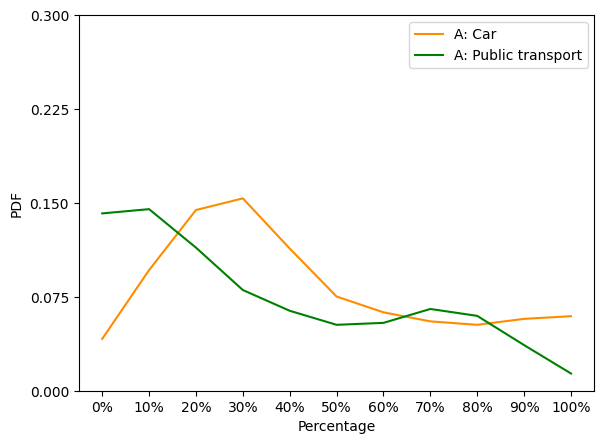

In [17]:
dens_a = stats.gaussian_kde(dfa['player.LL'])
dens_b = stats.gaussian_kde(10-dfb['player.HH'])

plt.plot(x_a, dens_a(x_a), label='A: Car ',color='darkorange')
plt.plot(x_b,dens_b(x_b), label='A: Public transport',color='green')
plt.xlabel("Percentage")
plt.ylabel("PDF")
plt.legend(loc='upper right')
plt.yticks((np.linspace(0,0.3,5)))
plt.xticks((np.linspace(0,10,11)), ['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.tight_layout(pad=2, w_pad=4, h_pad=3)
#plt.savefig(r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\bars\kernLL.png')
plt.show()

In [18]:
np.mean(dfa['player.LL']),np.std(dfa['player.LL']),np.mean(10-dfb['player.HH']),np.std(10-dfb['player.HH'])

(4.853281853281853, 3.2085941005409064, 2.6454545454545455, 3.107429114634692)

In [19]:
# show max 11-dfb['player.EE']
dfa['player.EE'].max()

11.0

In [20]:
dfb

,participant.code,participant.id_in_session,player.EE,What share (in %) of other participants in the survey do you think have chosen one of the transport modes in A for their daily trip?,player.HH,Imagine that most of the people answering this survey say that they use option A for their daily trip and that most of them think that other people should also use option A. How often (in %) would you use option A in this scenario?,player.HL,Imagine that most of the people answering this survey say that they use option A for their daily trip and that most of them think that other people should use option B. How often (in %) would you use option A in this scenario?,player.LH,Imagine that most of the people answering this survey say that they use option B for their daily trip and that most of them think that other people should use option A. How often (in %) would you use option A in this scenario?,player.LL,Which year were you born?,Imagine that most of the people answering this survey say that they use option B for their daily trip and that most of them also think that other people should use option B. How often (in %) would you use option A in this scenario?,player.Madrid_central,player.NE,What share (in %) of other participants in the survey do you think have mostly chosen option A (answered more than 50%) in the previous question?,player.PNB,"In your opinion, what should the ideal percentage of people using transport modes in A for their daily trip be?",player.SN_car_A,Considering the following transport mode group:,player.air_pollution,"How much do you agree with the following statements from 1 to 7, where 1 means ‘I completely disagree’ and 7 means ‘I completely agree’? Air pollution derived by cars is one of the major causes of premature death in Europe:",player.children,How many children under the age of 15 live with you?,player.comments,player.education,What is your highest level of education?,player.effect_rp,player.effect_rp_others,player.family,How many people does your household have including you?,player.gender,How do you identify as?,player.id_in_group,player.income,What is your income per year?,player.my_trip,"Considering the last year, how often (in %) did you use your chosen transport mode for your daily trip?",player.revenues,Revenues collected through taxes are used to create a well-functioning welfare state and society:,player.road_pricing,The introduction of policies such as road pricing will alleviate congestion problems:,player.tax,Tax revenues should be used to help those who are more in need:,player.tax_level,player.trust_county,County council:,player.trust_government,Government:,player.trust_municipality,Municipal council,player.trust_parlament,"How much do you personally trust the following institutions from 1 to 7, where 1 means ‘No trust at all’ and 7 means ‘Trust compltely’? Parlament:",player.trust_parties,Political parties:,player.trust_politicians,National politicians:,player.vote,Which political party you voted for in the last election?,player.year_born,session.code,subsession.round_number,treatment
0,00yymq0o,56,8.0,30%,1.0,0%,4.0,30%,1.0,0%,1.0,1996,0%,4.0,10.0,10%,11.0,0%,0.0,"A: Public Transport, cycling and walking",7.0,7,0.0,0,NaN,3.0,university (more than 4 years),6.0,4.0,0.0,0,0.0,woman,56,0.0,less than 10k EUR,11.0,100%,5.0,5,5.0,5,6.0,6,1.0,5.0,5,5.0,5,4.0,4,6.0,6,4.0,4,4.0,4,0.0,PSOE,1996.0,uln4i2w2,1,Baseline
1,025baf3d,53,4.0,70%,6.0,50%,9.0,80%,9.0,80%,9.0,2001,80%,3.0,8.0,30%,9.0,20%,0.0,"A: Public Transport, cycling and walking",6.0,6,0.0,0,Falta de opción de 0 en la pregunta sobre la c...,2.0,university (less than 4 years),3.0,1.0,2.0,2,0.0,woman,53,0.0,less than 10k EUR,11.0,100%,3.0,3,4.0,4,6.0,6,2.0,4.0,4,4.0,4,6.0,6,5.0,5,3.0,3,3.0,3,3.0,Unidas Podemos,2001.0,uln4i2w2,1,Public Services
2,04x8stxz,35,8.0,30%,9.0,80%,9.0,80%,9.0,80%,9.0,2002,80%,4.0,9.0,20%,10.0,10%,0.0,"A: Public Transport, cycling and walking",6.0,6,0.0,0,NaN,3.0,university (more than 4 years),2.0,2.0,3.0,3,0.0,w

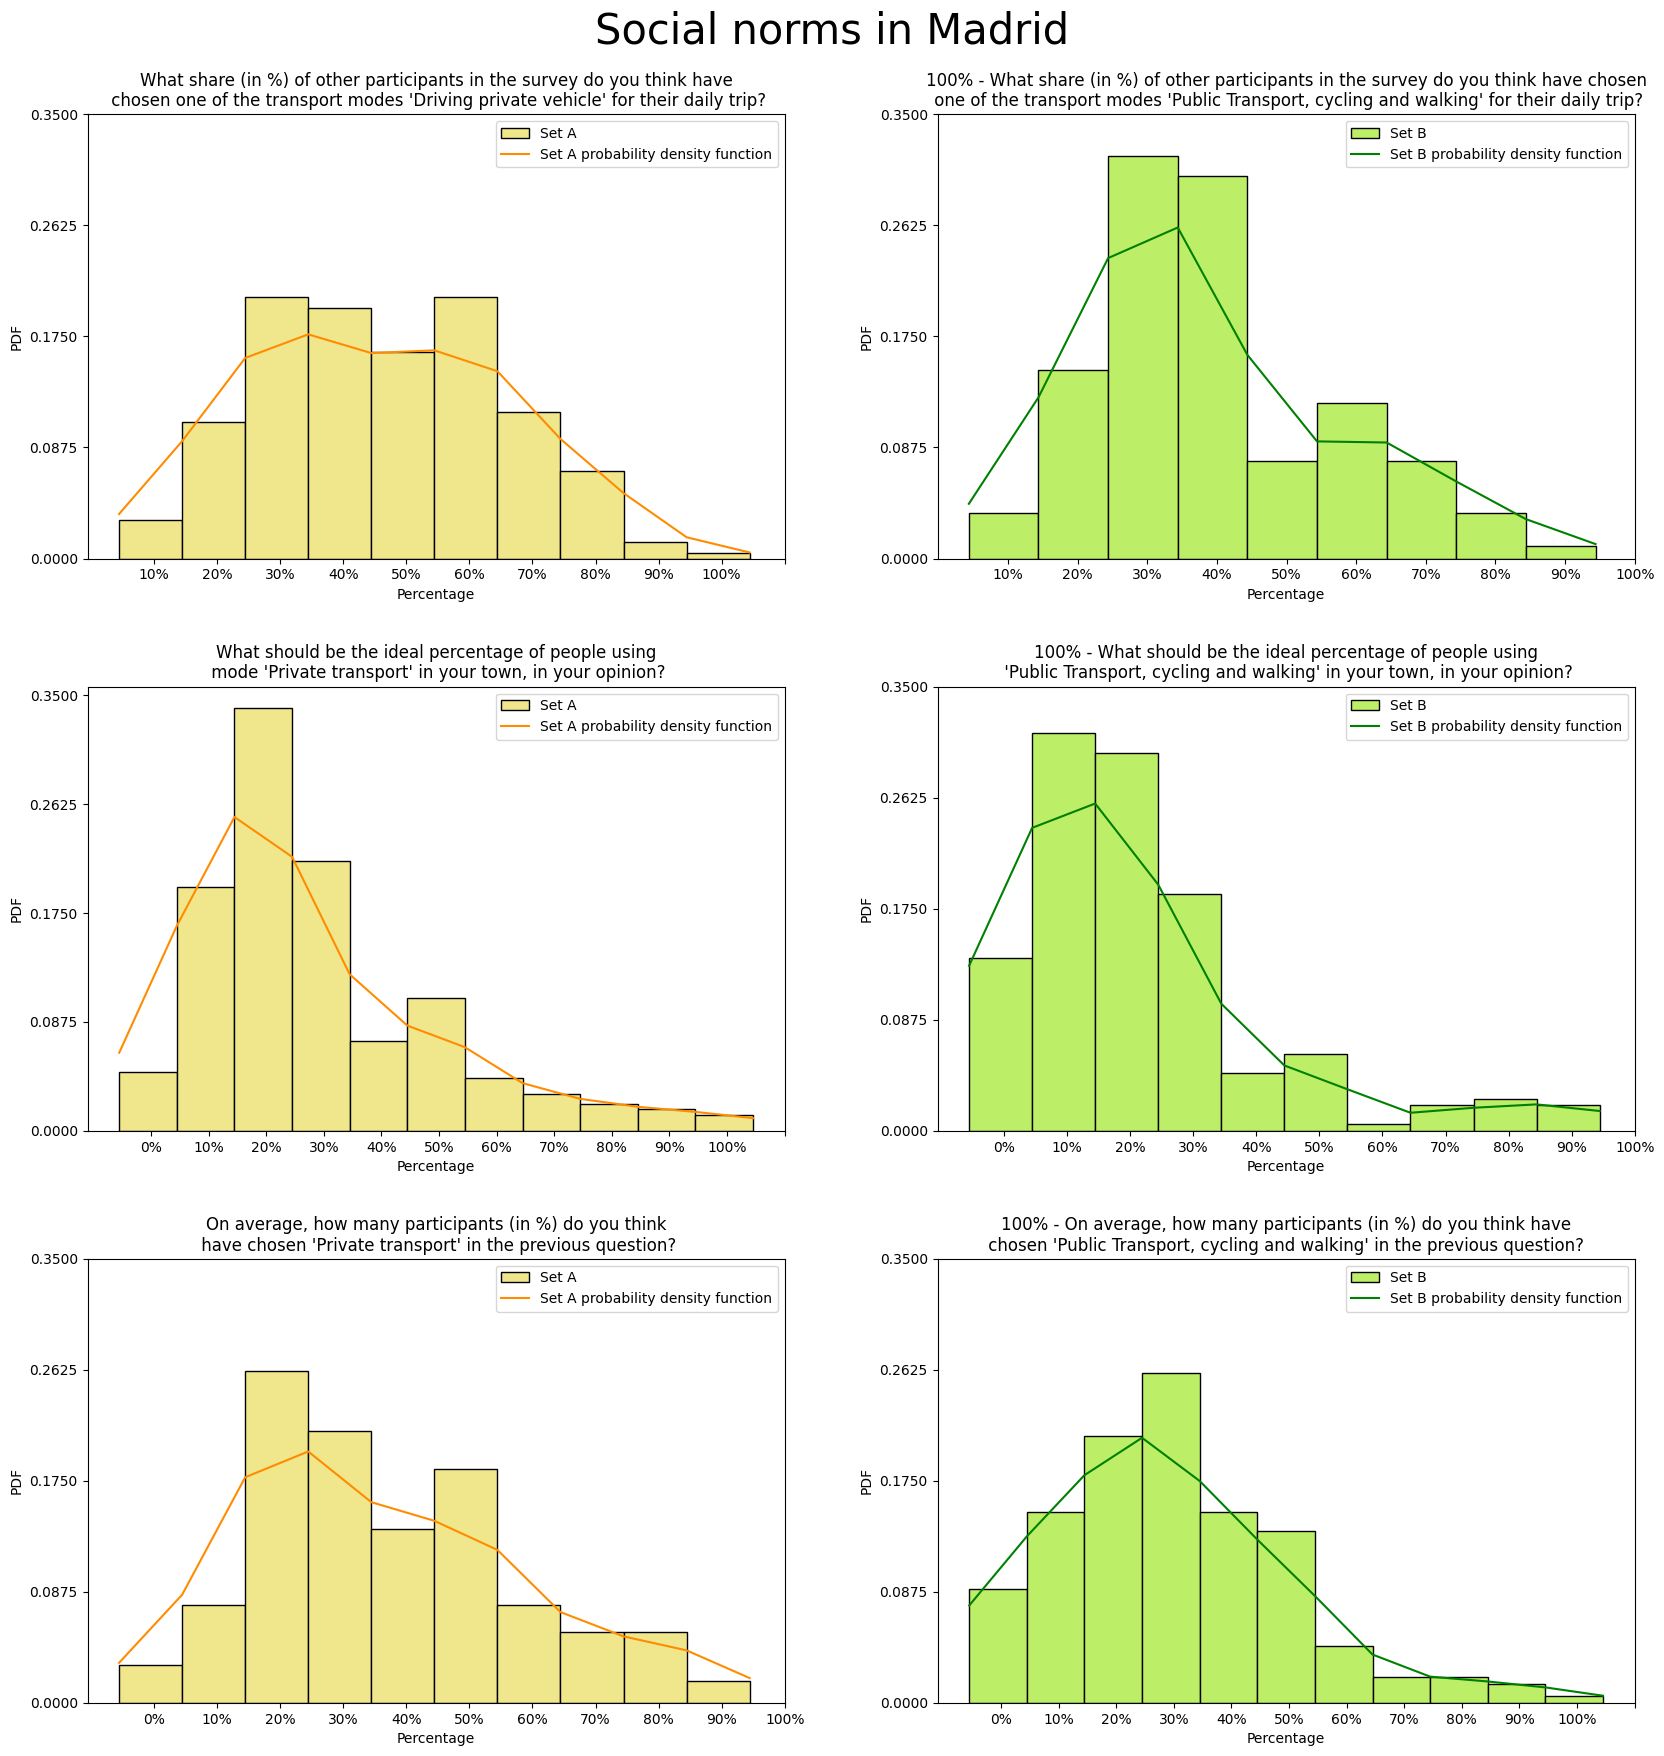

In [21]:
fig, axs = plt.subplots(nrows=3, ncols=2,  figsize=(17, 18))
fig.suptitle('Social norms in Madrid', fontsize=30)

dens_a = stats.gaussian_kde(dfa['player.EE'])
n, x_a, _ = axs[0,0].hist(dfa['player.EE'],bins=len(dfa['player.EE'].unique()), density=True, label='Set A', color='khaki', edgecolor='black')
axs[0,0].plot(x_a,dens_a(x_a), label='Set A probability density function',color='darkorange')
axs[0,0].set_title("What share (in %) of other participants in the survey do you think have\n chosen one of the transport modes 'Driving private vehicle' for their daily trip?")
axs[0,0].set_xlabel("Percentage")
axs[0,0].set_ylabel("PDF")
axs[0,0].legend(loc='upper right')
axs[0,0].set_yticks((np.linspace(0,0.35,5)))
axs[0,0].set_xticks(0.5+x_a, ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%',''])


dens_b = stats.gaussian_kde(11-dfb['player.EE'])
n, x_b, _ = axs[0,1].hist((11-dfb['player.EE']),bins=len(dfb['player.EE'].unique()), density=True, label='Set B', color='#BCEE68', edgecolor='black')
axs[0,1].plot(x_b,dens_b(x_b), label='Set B probability density function',color='green')
axs[0,1].set_title("100% - What share (in %) of other participants in the survey do you think have chosen\n one of the transport modes 'Public Transport, cycling and walking' for their daily trip?")
axs[0,1].set_xlabel("Percentage")
axs[0,1].set_ylabel("PDF")
axs[0,1].legend(loc='upper right')
axs[0,1].set_yticks((np.linspace(0,0.35,5)))
axs[0,1].set_xticks(0.5+x_b, ['10%','20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%','100%'])



dens_a = stats.gaussian_kde(dfa['player.PNB'])
n, x_a, _ = axs[1,0].hist(dfa['player.PNB'],bins=len(dfa['player.PNB'].unique()), density=True, label='Set A', color='khaki', edgecolor='black')
axs[1,0].plot(x_a,dens_a(x_a), label='Set A probability density function',color='darkorange')
axs[1,0].set_title("What should be the ideal percentage of people using\n mode 'Private transport' in your town, in your opinion?")
axs[1,0].set_xlabel("Percentage")
axs[1,0].set_ylabel("PDF")
axs[1,0].legend(loc='upper right')
axs[1,0].set_yticks((np.linspace(0,0.35,5)))
axs[1,0].set_xticks(0.5+x_a, ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%',''])



dens_b = stats.gaussian_kde(11-dfb['player.PNB'])
n, x_b, _ = axs[1,1].hist((11-dfb['player.PNB']),bins=len(dfb['player.PNB'].unique()), density=True, label='Set B', color='#BCEE68', edgecolor='black')
axs[1,1].plot(x_b,dens_b(x_b), label='Set B probability density function',color='green')
axs[1,1].set_title("100% - What should be the ideal percentage of people using\n 'Public Transport, cycling and walking' in your town, in your opinion?")
axs[1,1].set_xlabel("Percentage")
axs[1,1].set_ylabel("PDF")
axs[1,1].legend(loc='upper right')
axs[1,1].set_yticks((np.linspace(0,0.35,5)))
axs[1,1].set_xticks(0.5+x_b, ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])


dens_a = stats.gaussian_kde(dfa['player.NE'])
n, x_a, _ = axs[2,0].hist(dfa['player.NE'],bins=len(dfa['player.NE'].unique()), density=True, label='Set A', color='khaki', edgecolor='black')
axs[2,0].plot(x_a,dens_a(x_a), label='Set A probability density function',color='darkorange')
axs[2,0].set_title("On average, how many participants (in %) do you think\n have chosen 'Private transport' in the previous question?")
axs[2,0].set_xlabel("Percentage")
axs[2,0].set_ylabel("PDF")
axs[2,0].legend(loc='upper right')
axs[2,0].set_yticks((np.linspace(0,0.35,5)))
axs[2,0].set_xticks(0.5+x_a, ['0%','10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])


dens_b = stats.gaussian_kde(11-dfb['player.NE'])
n, x_b, _ = axs[2,1].hist((11-dfb['player.NE']),bins=len(dfb['player.NE'].unique()), density=True, label='Set B', color='#BCEE68', edgecolor='black')
axs[2,1].plot(x_b,dens_b(x_b), label='Set B probability density function',color='green')
axs[2,1].set_title("100% - On average, how many participants (in %) do you think have\n chosen 'Public Transport, cycling and walking' in the previous question? ")
axs[2,1].set_xlabel("Percentage")
axs[2,1].set_ylabel("PDF")
axs[2,1].legend(loc='upper right')
axs[2,1].set_yticks((np.linspace(0,0.35,5)))
axs[2,1].set_xticks(0.5+x_b, ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%',''])


plt.tight_layout(pad=2, w_pad=4, h_pad=3)
plt.savefig('hist_EE_Madrid_.pdf')

plt.show()

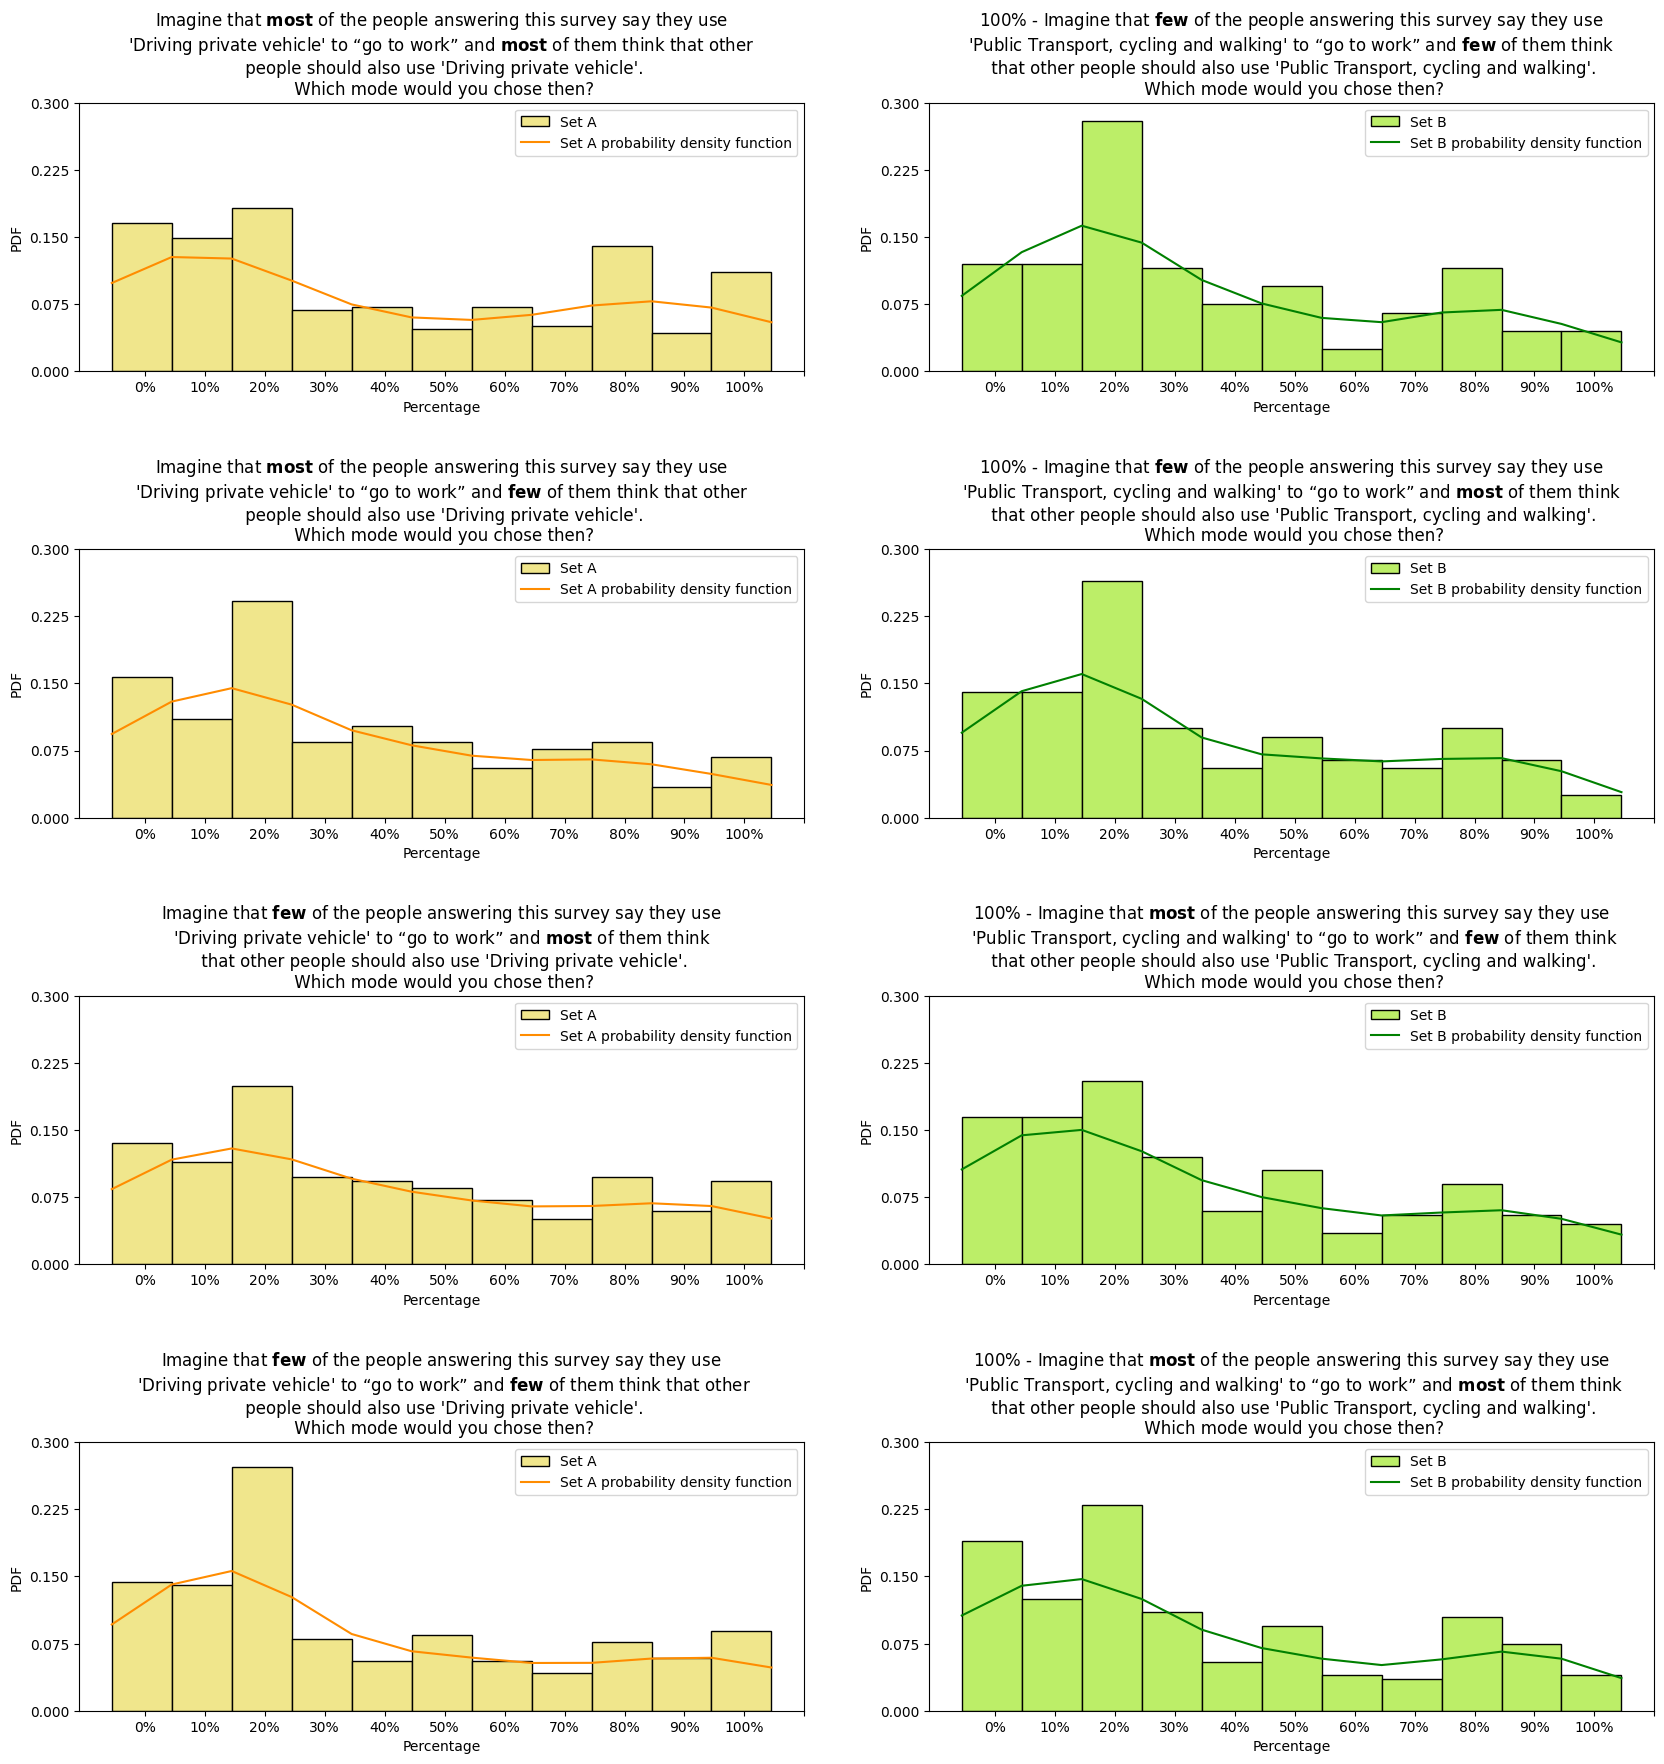

In [22]:
fig, axs = plt.subplots(nrows=4, ncols=2,  figsize=(17, 18))
#fig.suptitle('Social norms in all population', fontsize=30)

dens_a = stats.gaussian_kde(dfa['player.HH'])
n, x_a, _ = axs[0,0].hist(dfa['player.HH'],bins=len(dfa['player.HH'].unique()), density=True, label='Set A', color='khaki', edgecolor='black')
axs[0,0].plot(x_a,dens_a(x_a), label='Set A probability density function',color='darkorange')
axs[0,0].set_title("Imagine that " + r"$\bf{most}$ "+"of the people answering this survey say they use\n'Driving private vehicle' to “go to work” and " + r"$\bf{most}$ "+"of them think that other\n people should also use 'Driving private vehicle'.\n Which mode would you chose then?")
axs[0,0].set_xlabel("Percentage")
axs[0,0].set_ylabel("PDF")
axs[0,0].legend(loc='upper right')
axs[0,0].set_xticks(0.5+x_a, ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%',''])
axs[0,0].set_yticks((np.linspace(0,0.3,5)))

dens_b = stats.gaussian_kde(11-dfb['player.LL'])
n, x_b, _ = axs[0,1].hist((11-dfb['player.LL']),bins=len(dfb['player.LL'].unique()), density=True, label='Set B', color='#BCEE68', edgecolor='black')
axs[0,1].plot(x_b,dens_b(x_b), label='Set B probability density function',color='green')
axs[0,1].set_title("100% - Imagine that " + r"$\bf{few}$ "+"of the people answering this survey say they use\n'Public Transport, cycling and walking' to “go to work” and " + r"$\bf{few}$ "+"of them think\n that other people should also use 'Public Transport, cycling and walking'.\n Which mode would you chose then?")
axs[0,1].set_xlabel("Percentage")
axs[0,1].set_ylabel("PDF")
axs[0,1].legend(loc='upper right')
axs[0,1].set_xticks(0.5+x_b, ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%',''])
axs[0,1].set_yticks((np.linspace(0,0.3,5)))


dens_a = stats.gaussian_kde(dfa['player.HL'])
n, x_a, _ = axs[1,0].hist(dfa['player.HL'],bins=len(dfa['player.HL'].unique()), density=True, label='Set A', color='khaki', edgecolor='black')
axs[1,0].plot(x_a,dens_a(x_a), label='Set A probability density function',color='darkorange')
axs[1,0].set_title("Imagine that " + r"$\bf{most}$ "+"of the people answering this survey say they use\n'Driving private vehicle' to “go to work” and " + r"$\bf{few}$ "+"of them think that other\n people should also use 'Driving private vehicle'.\n Which mode would you chose then?")
axs[1,0].set_xlabel("Percentage")
axs[1,0].set_ylabel("PDF")
axs[1,0].legend(loc='upper right')
axs[1,0].set_xticks(0.5+x_a, ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%',''])
axs[1,0].set_yticks((np.linspace(0,0.3,5)))

dens_b = stats.gaussian_kde(11-dfb['player.LH'])
n, x_b, _ = axs[1,1].hist((11-dfb['player.LH']),bins=len(dfb['player.LH'].unique()), density=True, label='Set B', color='#BCEE68', edgecolor='black')
axs[1,1].plot(x_b,dens_b(x_b), label='Set B probability density function',color='green')
axs[1,1].set_title("100% - Imagine that " + r"$\bf{few}$ "+"of the people answering this survey say they use \n'Public Transport, cycling and walking' to “go to work” and " + r"$\bf{most}$ "+"of them think\n that other people should also use 'Public Transport, cycling and walking'.\n Which mode would you chose then?")
axs[1,1].set_xlabel("Percentage")
axs[1,1].set_ylabel("PDF")
axs[1,1].legend(loc='upper right')
axs[1,1].set_xticks(0.5+x_b, ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%',''])
axs[1,1].set_yticks((np.linspace(0,0.3,5)))

dens_a = stats.gaussian_kde(dfa['player.LH'])
n, x_a, _ = axs[2,0].hist(dfa['player.LH'],bins=len(dfa['player.LH'].unique()), density=True, label='Set A', color='khaki', edgecolor='black')
axs[2,0].plot(x_a,dens_a(x_a), label='Set A probability density function',color='darkorange')
axs[2,0].set_title("Imagine that " + r"$\bf{few}$ "+"of the people answering this survey say they use\n'Driving private vehicle' to “go to work” and " + r"$\bf{most}$ "+"of them think\n that other people should also use 'Driving private vehicle'.\n Which mode would you chose then?")
axs[2,0].set_xlabel("Percentage")
axs[2,0].set_ylabel("PDF")
axs[2,0].legend(loc='upper right')
axs[2,0].set_xticks(0.5+x_a, ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%',''])
axs[2,0].set_yticks((np.linspace(0,0.3,5)))

dens_b = stats.gaussian_kde(12-dfb['player.HL'])
n, x_b, _ = axs[2,1].hist((12-dfb['player.HL']),bins=len(dfb['player.HL'].unique()), density=True, label='Set B', color='#BCEE68', edgecolor='black')
axs[2,1].plot(x_b,dens_b(x_b), label='Set B probability density function',color='green')
axs[2,1].set_title("100% - Imagine that " + r"$\bf{most}$ "+"of the people answering this survey say they use\n 'Public Transport, cycling and walking' to “go to work” and " + r"$\bf{few}$ "+"of them think\n that other people should also use 'Public Transport, cycling and walking'.\n Which mode would you chose then?")
axs[2,1].set_xlabel("Percentage")
axs[2,1].set_ylabel("PDF")
axs[2,1].legend(loc='upper right')
axs[2,1].set_xticks(0.5+x_a, ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%',''])
axs[2,1].set_yticks((np.linspace(0,0.3,5)))

dens_a = stats.gaussian_kde(dfa['player.LL'])
n, x_a, _ = axs[3,0].hist(dfa['player.LL'],bins=len(dfa['player.LL'].unique()), density=True, label='Set A', color='khaki', edgecolor='black')
axs[3,0].plot(x_a,dens_a(x_a), label='Set A probability density function',color='darkorange')
axs[3,0].set_title("Imagine that " + r"$\bf{few}$ "+"of the people answering this survey say they use\n 'Driving private vehicle' to “go to work” and " + r"$\bf{few}$ "+"of them think that other\n people should also use 'Driving private vehicle'.\n Which mode would you chose then?")
axs[3,0].set_xlabel("Percentage")
axs[3,0].set_ylabel("PDF")
axs[3,0].legend(loc='upper right')
axs[3,0].set_xticks(0.5+x_a, ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%',''])
axs[3,0].set_yticks((np.linspace(0,0.3,5)))

dens_b = stats.gaussian_kde(12-dfb['player.HH'])
n, x_b, _ = axs[3,1].hist((12-dfb['player.HH']),bins=len(dfb['player.HH'].unique()), density=True, label='Set B', color='#BCEE68', edgecolor='black')
axs[3,1].plot(x_b,dens_b(x_b), label='Set B probability density function',color='green')
axs[3,1].set_title("100% - Imagine that " + r"$\bf{most}$ "+"of the people answering this survey say they use\n 'Public Transport, cycling and walking' to “go to work” and " + r"$\bf{most}$ "+ "of them think\n that other people should also use 'Public Transport, cycling and walking'.\n Which mode would you chose then?")
axs[3,1].set_xlabel("Percentage")
axs[3,1].set_ylabel("PDF")
axs[3,1].legend(loc='upper right')
axs[3,1].set_xticks(0.5+x_a, ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%',''])
axs[3,1].set_yticks((np.linspace(0,0.3,5)))

plt.tight_layout(pad=2, w_pad=4, h_pad=3)
#plt.savefig('hist_HL_Madrid_.pdf')

plt.show()